In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train_data.csv')
val = pd.read_csv('val_data.csv')
test = pd.read_csv('test_data.csv')

In [3]:
train.head()

,X,y
0,sudan has decided to postpone a decision to ex...,1
1,cell phone manufacturers are teaming up to bri...,3
2,although the united states is experiencing a s...,4
3,corporate raider vincent bollor said yesterday...,3
4,reuters hurricane ivan killed at least 20 peop...,1


In [4]:
test.head()

,X,y
0,quotwe 39re going to have a party quot maurice...,2
1,ap pittsburgh right guard kendall simmons will...,2
2,pro basketball charlotte vs celtics at the fle...,2
3,vladimir guerrero made such a huge impact duri...,2
4,england captain david beckham has denied repor...,2


In [5]:
val.head()

,X,y
0,the european union must embrace economic refor...,3
1,if there are any democratic quott 39s quot to ...,1
2,washington reuters yous federal communications...,3
3,almonds are one of california 39s most valuabl...,3
4,mark hurlbert the prosecutor who spent hundred...,2


In [6]:
X_train = train['X']
y_train = train['y']

In [7]:
X_val = val['X']
y_val = val['y']

In [8]:
X_test = test['X']
y_test = test['y']

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
tfidf = TfidfVectorizer()

In [11]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
# X_test_tfidf = tfidf.transform(X_val) ------------ Attempt 1: Wrong parameter passed
X_test_tfidf = tfidf.transform(X_test)

In [12]:
# X_train_tfidf.head() ---------- Attempt 1: to print tfidf vector
# X_train_tfidf[:5] ---------- Attempt 2: to print tfidf vector
tfidf.get_feature_names_out()[:20]

array(['00', '000', '000660se', '000th', '0013', '0013hk', '002', '004',
       '005', '005930ks', '007', '007percent', '008', '008s', '009', '01',
       '010', '0100', '011', '01102004'], dtype=object)

In [13]:
X_train_tfidf.shape, X_val_tfidf.shape, X_test_tfidf.shape

((89320, 80439), (19140, 80439), (19140, 80439))

In [14]:
tfidf.vocabulary_

{'sudan': 68937,
 'has': 33632,
 'decided': 21987,
 'to': 72735,
 'postpone': 55086,
 'decision': 21999,
 'expel': 27247,
 'the': 71498,
 'heads': 33905,
 'of': 50489,
 'two': 74439,
 'british': 14776,
 'aid': 7724,
 'agencies': 7549,
 'oxfam': 52255,
 'and': 8937,
 'save': 63053,
 'children': 17467,
 'citing': 17844,
 'administrative': 7139,
 'difficulties': 23127,
 'humanitarian': 36121,
 'grounds': 32634,
 'cell': 16785,
 'phone': 53884,
 'manufacturers': 44518,
 'are': 10038,
 'teaming': 70827,
 'up': 75579,
 'bring': 14746,
 'mobile': 46810,
 'television': 71056,
 'your': 80002,
 'handset': 33364,
 'although': 8504,
 'united': 75284,
 'states': 67859,
 'is': 38696,
 'experiencing': 27265,
 'shortage': 65050,
 'flu': 29234,
 'vaccines': 76147,
 'this': 72110,
 'fall': 27721,
 'do': 23838,
 'not': 49866,
 'be': 12302,
 'so': 66402,
 'eager': 24871,
 'for': 29445,
 'one': 51064,
 'that': 71429,
 'you': 79966,
 'duped': 24692,
 'into': 38300,
 'purchasing': 56647,
 'it': 38869,
 'onli

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
MNB_model = MultinomialNB()
MNB_model.fit(X_train_tfidf,y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [17]:
y_train_pred = MNB_model.predict(X_train_tfidf)
y_val_pred = MNB_model.predict(X_val_tfidf)
y_test_pred = MNB_model.predict(X_test_tfidf)

In [18]:
## Attempt 1 - Because of wrong vectorization on X_test, test accuracy was approximately 0.24
# from sklearn.metrics import accuracy_score, f1_score, classification_report

# train_accuracy = accuracy_score(y_train, y_train_pred)
# train_f1_score = f1_score(y_train, y_train_pred)
# val_accuracy = accuracy_score(y_val, y_val_pred)
# val_f1_score = f1_score(y_val, y_val_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# test_f1_score = f1_score(y_test, y_test_pred)

# print(f"Train Accuracy: {train_accuracy*100:.2f}%")
# print(f"Validation Accuracy: {val_accuracy*100:.2f}%")
# print(f"Test Accuracy: {test_accuracy*100:.2f}%")

## Attempt 2 with correct X_test vectorzied
from sklearn.metrics import accuracy_score, f1_score, classification_report
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred, average='weighted')

print(f"Train Accuracy: {train_accuracy*100:.2f}%")
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}% \n")
print(f"Train F1 Score: {train_f1_score:.2f}")
print(f"Validation F1 Score: {val_f1_score:.2f}")
print(f"Test F1 Score: {test_f1_score:.2f} \n")

class_names = ['World', 'Sports', 'Business', 'Sci/Tech']

print(classification_report(y_test,y_test_pred, target_names=class_names, digits=4))

Train Accuracy: 91.37%
Validation Accuracy: 89.70%
Test Accuracy: 89.77% 

Train F1 Score: 0.91
Validation F1 Score: 0.90
Test F1 Score: 0.90 

              precision    recall  f1-score   support

       World     0.9033    0.8859    0.8945      4785
      Sports     0.9438    0.9728    0.9581      4785
    Business     0.8619    0.8713    0.8666      4785
    Sci/Tech     0.8805    0.8608    0.8705      4785

    accuracy                         0.8977     19140
   macro avg     0.8974    0.8977    0.8974     19140
weighted avg     0.8974    0.8977    0.8974     19140



In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [24]:
cm = confusion_matrix(test['y'], y_test_pred)
cm

array([[4239,  168,  245,  133],
       [  71, 4655,   28,   31],
       [ 183,   38, 4169,  395],
       [ 200,   71,  395, 4119]])

<Axes: >

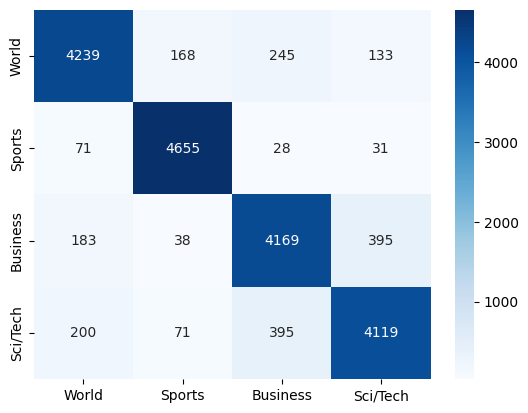

In [25]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)